## Problem statement

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
#Read the dataset
data = pd.read_csv('C:\\Users\\ajadi\\Downloads\\AirQuality.csv',delimiter=';')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


## Calculating AQI

In [151]:
#Adding the column of AQI
#Calculate the AQI
breakpoints = {
    'CO(GT)': [(0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200)],
    'NO2(GT)': [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200)]
}
def calculate_sub_index(value, breakpoints):
    for (c_low, c_high, i_low, i_high) in breakpoints:
        if c_low <= value <= c_high:
            return ((i_high - i_low) / (c_high - c_low)) * (value - c_low) + i_low
    return np.nan    #If value doesn't fit any range

# Calculate AQI for each pollutant
data['CO_AQI'] = data['CO(GT)'].apply(lambda x: calculate_sub_index(float(str(x).replace(',', '.')), breakpoints['CO(GT)']))
data['NO2_AQI'] = data['NO2(GT)'].apply(lambda x: calculate_sub_index(float(str(x).replace(',', '.')), breakpoints['NO2(GT)']))

# Determine the overall AQI as the maximum of individual pollutant AQIs
data['AQI'] = data[['CO_AQI', 'NO2_AQI']].max(axis=1)

# Display  calculated AQI values
data[['Date', 'Time', 'CO(GT)', 'NO2(GT)', 'CO_AQI', 'NO2_AQI', 'AQI']].head()


,Date,Time,CO(GT),NO2(GT),CO_AQI,NO2_AQI,AQI
0,10/03/2004,18.00.00,"2,6",113.0,29.545455,103.270270,103.270270
1,10/03/2004,19.00.00,2,92.0,22.727273,91.478261,91.478261
2,10/03/2004,20.00.00,"2,2",114.0,25.000000,103.459459,103.459459
3,10/03/2004,21.00.00,"2,2",122.0,25.000000,104.972973,104.972973
4,10/03/2004,22.00.00,"1,6",116.0,18.181818,103.837838,103.837838


## Data Cleaning

In [29]:
#Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)



Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
CO_AQI           1797
NO2_AQI          1756
AQI              1340
dtype: int64


## Univariate Analysis

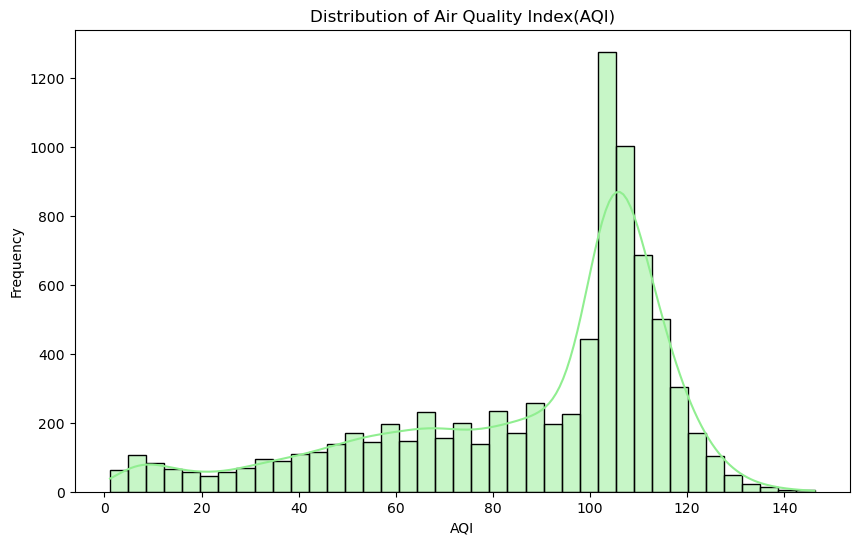

In [153]:
#Anaylysing AQI distribution using histogram
plt.figure(figsize=(10,6))
sns.histplot(data['AQI'],kde=True, color='lightgreen')
plt.title('Distribution of Air Quality Index(AQI)')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


In [163]:
#converting CO(GT) datatype from object to float
data['CO(GT)'] = pd.to_numeric(data['CO(GT)'].astype(str).str.replace(',', ''), errors='coerce')
data['CO(GT)'].dtypes



dtype('float64')

In [161]:
#coverting C6H6(GT) datatype from object to float
data['C6H6(GT)'] = pd.to_numeric(data['C6H6(GT)'].astype(str).str.replace(',', ''), errors='coerce')
data['C6H6(GT)'].dtypes

dtype('float64')

In [93]:
#to check the datatype of pollutants and AQI is float value or not
print(data[pollutants + ['AQI']].dtypes)
#First five rows
print(data[pollutants + ['AQI']].head())

CO(GT)      float64
NO2(GT)     float64
C6H6(GT)    float64
AQI         float64
dtype: object
   CO(GT)  NO2(GT)  C6H6(GT)         AQI
0    26.0    113.0     119.0  103.270270
1     2.0     92.0      94.0   91.478261
2    22.0    114.0      90.0  103.459459
3    22.0    122.0      92.0  104.972973
4    16.0    116.0      65.0  103.837838


## Bivariate Analysis

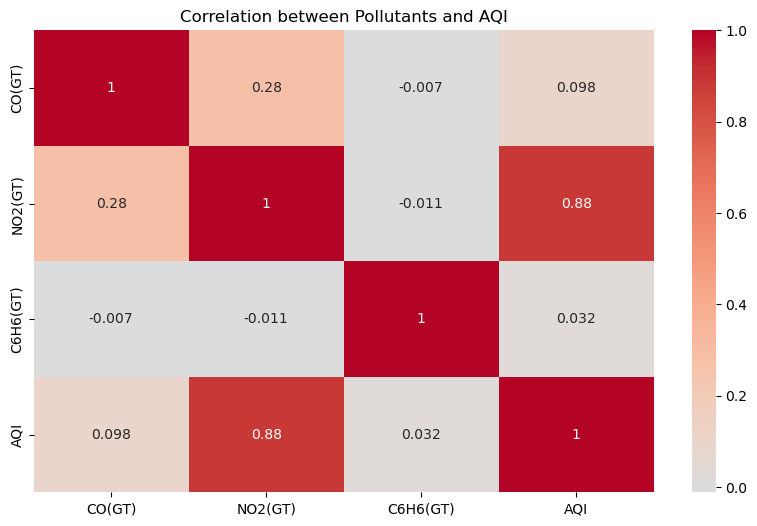

In [165]:
#Correlation between pollutants and AQI
pollutants = ['CO(GT)','NO2(GT)','C6H6(GT)']
plt.figure(figsize=(10, 6))
sns.heatmap(data[pollutants + ['AQI']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Pollutants and AQI')
plt.show()


## Monthly Analysis

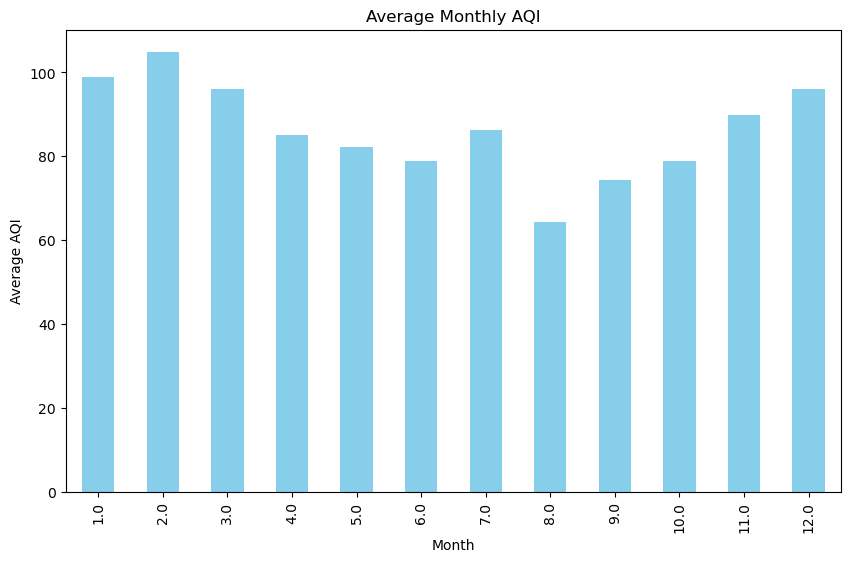

In [171]:
data['Month'] = data.index.month
monthly_aqi = data.groupby('Month')['AQI'].mean()
#Plot the graph to show the average monthly AQI
plt.figure(figsize=(10, 6))
monthly_aqi.plot(kind='bar', color='skyblue')
plt.title('Average Monthly AQI')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.show()


## Plot AQI over time

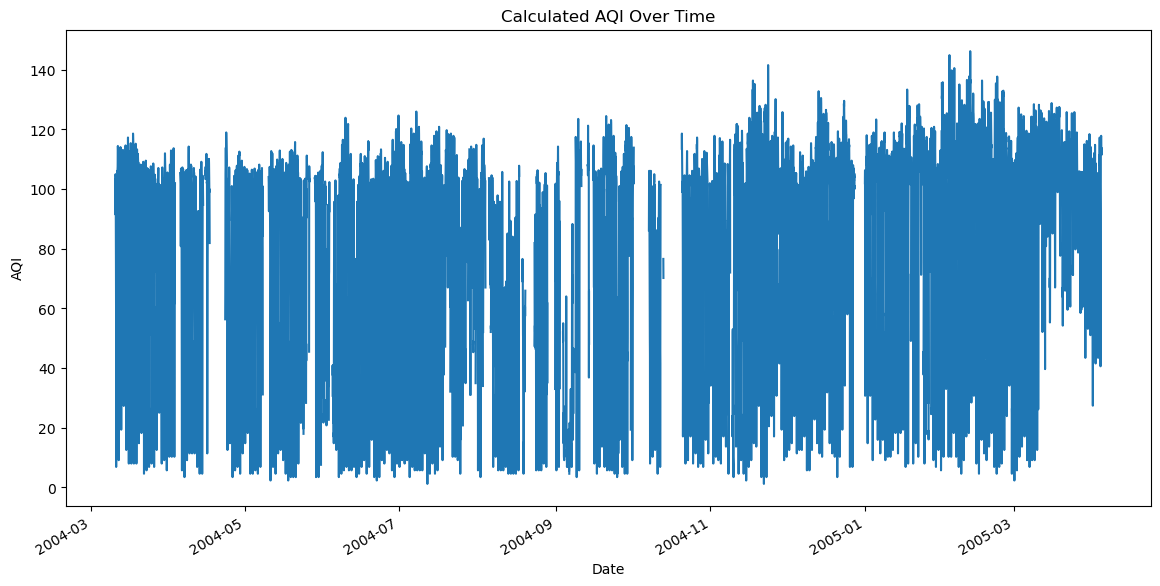

In [169]:
# Combine Date and Time into a DateTime column
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S')

# Set DateTime as the index for time series analysis
data.set_index('DateTime', inplace=True)

# Plot the AQI over time
plt.figure(figsize=(14, 7))
data['AQI'].plot()
plt.title('Calculated AQI Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()